 # CCT COLLEGE
 - Module Title: Machine Learning For AI
 - Assessment Title: ML_CA1
 - Lecturer Name: David McQuaid
 - Student Name: Heber Mota
 - Student Number: 2020337
 - Assessment Due Date: 22/04/2024
 - Date of Submission: 10/04/2024


Github: https://github.com/heberjuunior/Heber_ML_CA1_Y4

# Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
import time
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler


# Data Understanding - Log2 Dataset

In [2]:
df = pd.read_csv('log2.csv')
df.head(10)

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received,Action
0,57222,53,54587,53,177,94,83,2,30,1,1,allow
1,56258,3389,56258,3389,4768,1600,3168,19,17,10,9,allow
2,6881,50321,43265,50321,238,118,120,2,1199,1,1,allow
3,50553,3389,50553,3389,3327,1438,1889,15,17,8,7,allow
4,50002,443,45848,443,25358,6778,18580,31,16,13,18,allow
5,51465,443,39975,443,3961,1595,2366,21,16,12,9,allow
6,60513,47094,45469,47094,320,140,180,6,7,3,3,allow
7,50049,443,21285,443,7912,3269,4643,23,96,12,11,allow
8,52244,58774,2211,58774,70,70,0,1,5,1,0,allow
9,50627,443,16215,443,8256,1674,6582,31,75,15,16,allow


By examining the initial 10 rows, shape, and info of the dataset, we observe that it comprises 12 columns, being: Source Port, Destination Port, NAT Source Port, NAT Destination Port, Bytes, Bytes Sent, Bytes Received, Packets, Elapsed Time (sec), pkts_sent, pkts_received, and Action. Notably, all columns, except for Action, consist of integer data types. 

The Action column, on the other hand, is of type object. Additionally, it is noted that the dataset "log2.csv" has a total of 65532 rows.

Below, we can see that in this dataset there is no missing value.

In [3]:
df.isnull().sum()

Source Port             0
Destination Port        0
NAT Source Port         0
NAT Destination Port    0
Bytes                   0
Bytes Sent              0
Bytes Received          0
Packets                 0
Elapsed Time (sec)      0
pkts_sent               0
pkts_received           0
Action                  0
dtype: int64

In [4]:
df.shape

(65532, 12)

The dataset features over 65k rows and 12 features.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65532 entries, 0 to 65531
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Source Port           65532 non-null  int64 
 1   Destination Port      65532 non-null  int64 
 2   NAT Source Port       65532 non-null  int64 
 3   NAT Destination Port  65532 non-null  int64 
 4   Bytes                 65532 non-null  int64 
 5   Bytes Sent            65532 non-null  int64 
 6   Bytes Received        65532 non-null  int64 
 7   Packets               65532 non-null  int64 
 8   Elapsed Time (sec)    65532 non-null  int64 
 9   pkts_sent             65532 non-null  int64 
 10  pkts_received         65532 non-null  int64 
 11  Action                65532 non-null  object
dtypes: int64(11), object(1)
memory usage: 6.0+ MB


# EDA - Data Visualization

In this section, I am going explore the data in order to better understand it.

In [6]:
df.describe()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
count,65532.000000,65532.000000,65532.000000,65532.000000,6.553200e+04,6.553200e+04,6.553200e+04,6.553200e+04,65532.000000,65532.000000,65532.000000
mean,49391.969343,10577.385812,19282.972761,2671.049930,9.712395e+04,2.238580e+04,7.473815e+04,1.028660e+02,65.833577,41.399530,61.466505
std,15255.712537,18466.027039,21970.689669,9739.162278,5.618439e+06,3.828139e+06,2.463208e+06,5.133002e+03,302.461762,3218.871288,2223.332271
min,0.000000,0.000000,0.000000,0.000000,6.000000e+01,6.000000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000
25%,49183.000000,80.000000,0.000000,0.000000,6.600000e+01,6.600000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000
50%,53776.500000,445.000000,8820.500000,53.000000,1.680000e+02,9.000000e+01,7.900000e+01,2.000000e+00,15.000000,1.000000,1.000000
75%,58638.000000,15000.000000,38366.250000,443.000000,7.522500e+02,2.100000e+02,4.490000e+02,6.000000e+00,30.000000,3.000000,2.000000
max,65534.000000,65535.000000,65535.000000,65535.000000,1.269359e+09,9.484772e+08,3.208818e+08,1.036116e+06,10824.000000,747520.000000,327208.000000


In [7]:
nat_allow = df[(df['NAT Source Port'] == df['NAT Destination Port']) & (df['Action'] == 'allow')].shape[0]
nat_deny = df[(df['NAT Source Port'] == df['NAT Destination Port']) & (df['Action'] == 'deny')].shape[0]
nat_drop = df[(df['NAT Source Port'] == df['NAT Destination Port']) & (df['Action'] == 'drop')].shape[0]
nat_reset_both = df[(df['NAT Source Port'] == df['NAT Destination Port']) & (df['Action'] == 'reset-both')].shape[0]

print("Allow: ", nat_allow)
print("Deny: ", nat_deny)
print("Drop: ", nat_drop)
print("Reset-both: ", nat_reset_both)


Allow:  564
Deny:  14975
Drop:  12851
Reset-both:  42


Let's visualize how the "Action" is divided within allow, drop, deny and reset-both.

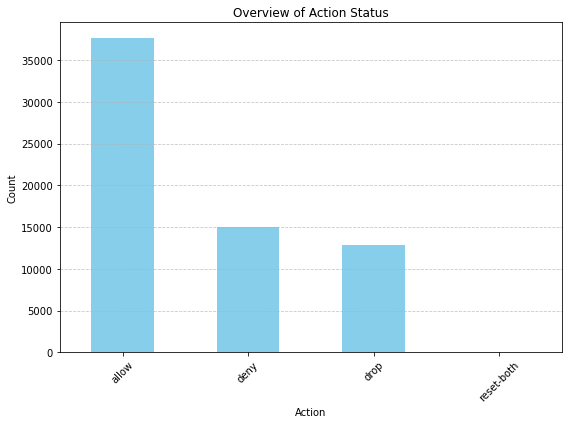

Action
allow         37640
deny          14987
drop          12851
reset-both       54
Name: count, dtype: int64

In [8]:
# Group the data by "Action" and count the occurrences of each action
action_counts = df['Action'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
action_counts.plot(kind='bar', color='skyblue')
plt.title('Overview of Action Status')
plt.xlabel('Action')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

df['Action'].value_counts()

When comparing Actions with Source Ports we can notice that they are balanced, although the allow action is still very high, ranking as the second place, drop is higher, followed by deny and reset-both also. 

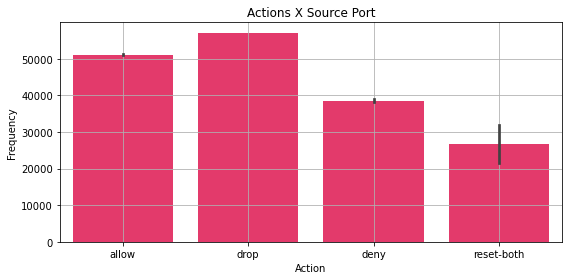

In [9]:
plt.figure(figsize=(8, 4))
sns.barplot(x=df['Action'], y=df['Source Port'], color='#FF1E5F')
plt.xlabel('Action')
plt.ylabel('Frequency')
plt.title('Actions X Source Port')
plt.grid(True)
plt.tight_layout()
plt.show()


When comparing the above graph with the following one below, we can see that we can also get a highlight in deny and reset-both when checking destination ports

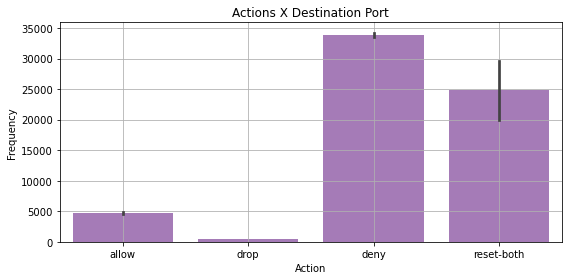

In [10]:
plt.figure(figsize=(8, 4))
sns.barplot(x=df['Action'], y=df['Destination Port'], color='#A971C1')
plt.xlabel('Action')
plt.ylabel('Frequency')
plt.title('Actions X Destination Port')
plt.grid(True)
plt.tight_layout()
plt.show()

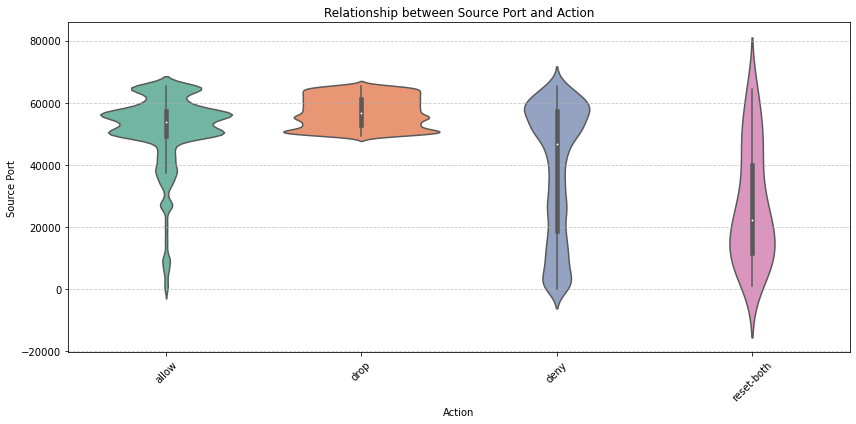

In [11]:
#violin plot to visualize the relationship between "Source Port" and "Action"
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='Action', y='Source Port', palette='Set2')
plt.title('Relationship between Source Port and Action')
plt.xlabel('Action')
plt.ylabel('Source Port')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In the violin plot, it is possible to point out that the concentration of "allow"s, "deny"s and "drop"s are located between the source ports 4000-7000 and the "reset-both" has its peak around source ports 0-3000.

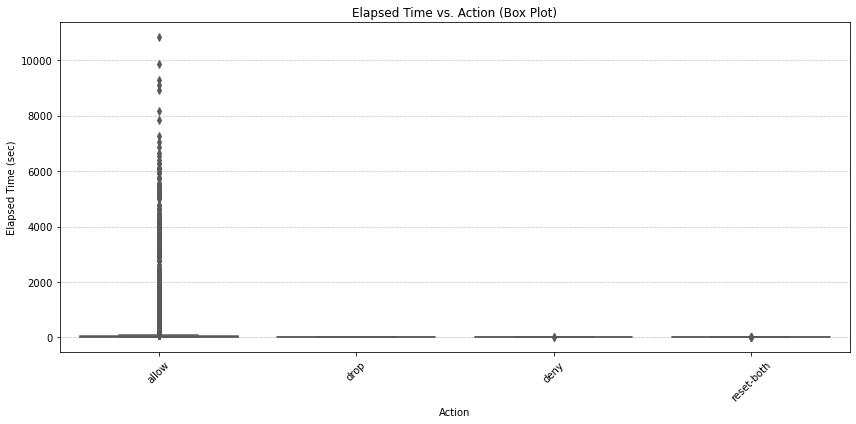

In [12]:
#box plot to visualize the relationship between "Elapsed Time" and "Action"
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Action', y='Elapsed Time (sec)', palette='Set2')
plt.title('Elapsed Time vs. Action (Box Plot)')
plt.xlabel('Action')
plt.ylabel('Elapsed Time (sec)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Above, in the box plot, we realize that the action that takes a longer Elapsed Time in seconds is "allow" which probably means that it is processed instead of being rejected straight away.

In [13]:
categorical = ['Source Port', 'Destination Port', 'NAT Source Port', 'NAT Destination Port']

For the next visualization, I have separated the categorical features containing the source and destination ports including the NAT ones to be listed in their total count so we can compare the different aspects and trends on the data.

In [14]:
# Create a list to store data for table visualization
table_data = []

# Define top 10 entries per feature
for f in categorical:
    feature_data = df[f].value_counts().head(10)
    table_data.append([f, '\n'.join(map(str, feature_data.index)), '\n'.join(map(str, feature_data.values))])


print(tabulate(table_data, headers=['Feature', 'Top 10 Entries', 'Count'], tablefmt='grid'))

+----------------------+------------------+---------+
| Feature              | Top 10 Entries   | Count   |
+======================+==================+=========+
| Source Port          | 58638            | 840     |
|                      | 27005            | 513     |
|                      | 443              | 273     |
|                      | 57470            | 222     |
|                      | 49418            | 210     |
|                      | 6881             | 177     |
|                      | 0                | 173     |
|                      | 50584            | 116     |
|                      | 3478             | 105     |
|                      | 26900            | 102     |
+----------------------+------------------+---------+
| Destination Port     | 53               | 15414   |
|                      | 445              | 12891   |
|                      | 443              | 11684   |
|                      | 80               | 4035    |
|                      | 251

By analysing the table, I have noticed that the sum of the number of NAT Source and Destination Ports in the Port 0 are very similar to the number of "deny" and "drop" count from the first bar visualization carried out. Where "drop" has about 15k and "deny" 13k entries. This may represent that all the packets sent or received by the same ports are invalidated and returned to their Source Port. 

To ensure about this assumption I will correlate the NAT addresses to the Action in its count as follows:

In [15]:
nat_counts = df[df['NAT Source Port'] == df['NAT Destination Port']]['Action'].value_counts()

print("Allow:", nat_counts.get('allow', 0))
print("Deny:", nat_counts.get('deny', 0))
print("Drop:", nat_counts.get('drop', 0))
print("Reset-both:", nat_counts.get('reset-both', 0))


Allow: 564
Deny: 14975
Drop: 12851
Reset-both: 42


This shows that the 564 allowed ports contain different destination and source ports, and the other 27,826 ports contain the same ones, being denied or dropped. 

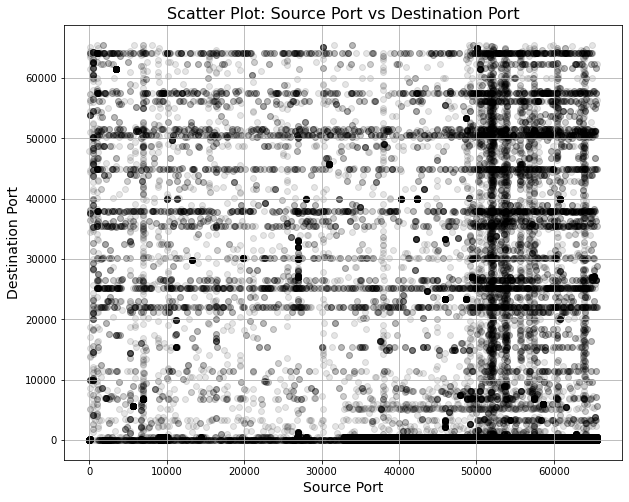

In [16]:
# Scatter plot for Source Port vs Destination Port
plt.figure(figsize=(10, 8))
plt.scatter(df['Source Port'], df['Destination Port'], alpha=0.1, color='black')
plt.xlabel('Source Port', fontsize=14)
plt.ylabel('Destination Port', fontsize=14)
plt.title('Scatter Plot: Source Port vs Destination Port', fontsize=16)
plt.grid(True)
plt.show()

In the scatter plot above, we can notice a concentration of ports correlating to the source port range of 5000-65535.

Visualization: Source Port Top 10 Entries


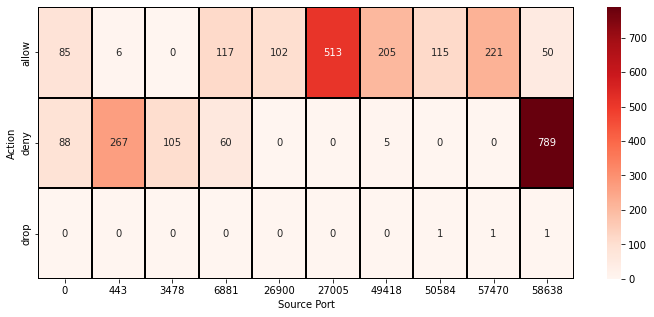

Visualization: Destination Port Top 10 Entries


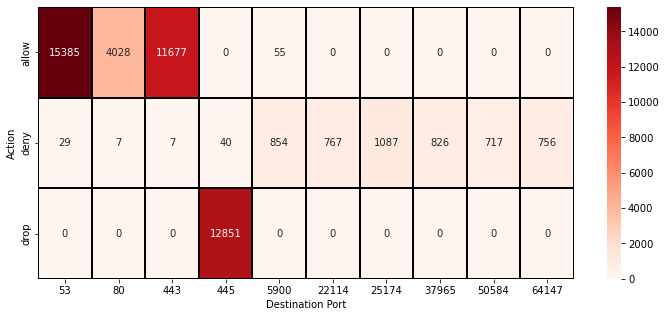

Visualization: NAT Source Port Top 10 Entries


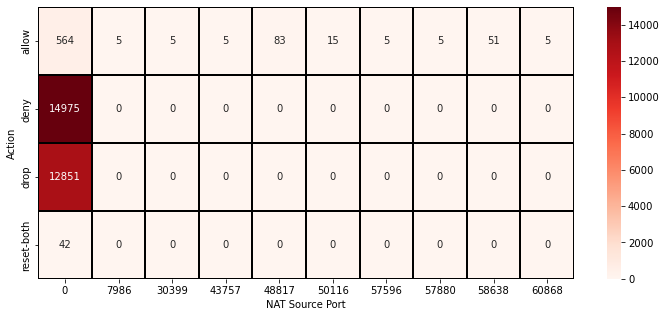

Visualization: NAT Destination Port Top 10 Entries


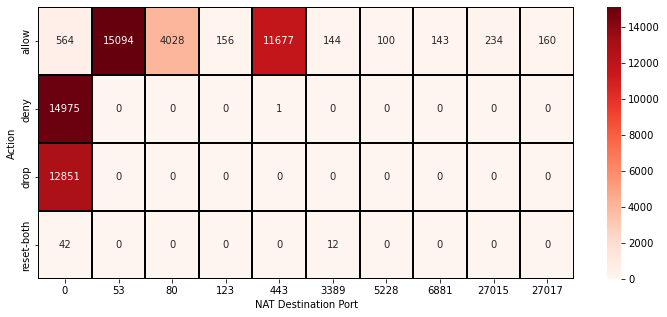

In [17]:
# crosstable with top 10 target vs feature 
for f in categorical:
    top10_levels = df[f].value_counts().head(10).index.to_list() 
    df_temp = df[df[f].isin(top10_levels)]
    ctab = pd.crosstab(df_temp['Action'], df_temp[f]) 
    print('Visualization:', f, 'Top 10 Entries')
    plt.figure(figsize=(12, 5))
    sns.heatmap(ctab, annot=True, fmt='d',
                cmap='Reds',
                linecolor='black',
                linewidths=0.1)
    plt.show()


in the crosstable visualization above, we can clearly see the contrast of ports being allowed, denied, dropped or "reset-both" highlighting the ports that are being accepted or denied from different standpoints.

# Data Preparation

I applied *MinMaxScaler* to standardize the numerical features, aiming to align them on a comparable scale. This process happens by subtracting the minimum value from each feature and then dividing it by the range, which represents the difference between the maximum and minimum values. MinMaxScaler maintains the original distribution shape while rectifying imbalances  highlighted during exploratory data analysis (EDA), thereby promoting balance across all features. By doing so, we mitigate the risk of introducing bias during dataset training.

In [18]:
numerical = ['Source Port', 'Destination Port', 'NAT Source Port', 'NAT Destination Port', 
                     'Bytes', 'Bytes Sent', 'Bytes Received', 'Packets', 'Elapsed Time (sec)', 
                     'pkts_sent', 'pkts_received']

In [19]:
min_max_scaler = MinMaxScaler()
df[numerical] = min_max_scaler.fit_transform(df[numerical])
df.head()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received,Action
0,0.873165,0.000809,0.832944,0.000809,9.217251e-08,3.584694e-08,2.586622e-07,9.651438e-07,0.002772,0.000000,0.000003,allow
1,0.858455,0.051713,0.858442,0.051713,3.708959e-06,1.623655e-06,9.872794e-06,1.737259e-05,0.001571,0.000012,0.000028,allow
2,0.104999,0.767849,0.660182,0.767849,1.402283e-07,6.115066e-08,3.739695e-07,9.651438e-07,0.110772,0.000000,0.000003,allow
3,0.771401,0.051713,0.771389,0.051713,2.573740e-06,1.452855e-06,5.886903e-06,1.351201e-05,0.001571,0.000009,0.000021,allow
4,0.762993,0.006760,0.699596,0.006760,1.992974e-05,7.082933e-06,5.790294e-05,2.895431e-05,0.001478,0.000016,0.000055,allow


## One-Hot Encoding

We will utilize One-Hot Encoding to convert the 'action' column into four distinct columns, each representing binary data. This transformation is necessary to convert categorical variables into numerical values. For instance, if the action value is 'deny', the 'Action_deny' column will be assigned the value 1 (true), while for other categories, it will be assigned 0 (false). This encoding scheme is applied uniformly across all action columns, ensuring that only one column holds the value 1 for each record while the rest contain 0.

In [20]:
df_encoded = pd.get_dummies(df, columns=['Action'])
df_encoded.head()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received,Action_allow,Action_deny,Action_drop,Action_reset-both
0,0.873165,0.000809,0.832944,0.000809,9.217251e-08,3.584694e-08,2.586622e-07,9.651438e-07,0.002772,0.000000,0.000003,True,False,False,False
1,0.858455,0.051713,0.858442,0.051713,3.708959e-06,1.623655e-06,9.872794e-06,1.737259e-05,0.001571,0.000012,0.000028,True,False,False,False
2,0.104999,0.767849,0.660182,0.767849,1.402283e-07,6.115066e-08,3.739695e-07,9.651438e-07,0.110772,0.000000,0.000003,True,False,False,False
3,0.771401,0.051713,0.771389,0.051713,2.573740e-06,1.452855e-06,5.886903e-06,1.351201e-05,0.001571,0.000009,0.000021,True,False,False,False
4,0.762993,0.006760,0.699596,0.006760,1.992974e-05,7.082933e-06,5.790294e-05,2.895431e-05,0.001478,0.000016,0.000055,True,False,False,False


# Training & Applying Classification Algorithms

As the 'allow' actions represent the predominant category within the dataset, I've opted to designate this column as the target variable. The following code accomplishes this by creating the X dataset, encompassing all columns except for 'Action_allow', and the y dataset, containing only the 'Action_allow' column.

In [21]:
x = df_encoded.drop('Action_allow', axis=1)
x.head()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received,Action_deny,Action_drop,Action_reset-both
0,0.873165,0.000809,0.832944,0.000809,9.217251e-08,3.584694e-08,2.586622e-07,9.651438e-07,0.002772,0.000000,0.000003,False,False,False
1,0.858455,0.051713,0.858442,0.051713,3.708959e-06,1.623655e-06,9.872794e-06,1.737259e-05,0.001571,0.000012,0.000028,False,False,False
2,0.104999,0.767849,0.660182,0.767849,1.402283e-07,6.115066e-08,3.739695e-07,9.651438e-07,0.110772,0.000000,0.000003,False,False,False
3,0.771401,0.051713,0.771389,0.051713,2.573740e-06,1.452855e-06,5.886903e-06,1.351201e-05,0.001571,0.000009,0.000021,False,False,False
4,0.762993,0.006760,0.699596,0.006760,1.992974e-05,7.082933e-06,5.790294e-05,2.895431e-05,0.001478,0.000016,0.000055,False,False,False


Next, I will partition the X (features) and y (target) datasets into training and testing subsets. The default test size of 0.25 will be utilized, and a random state of 0 will be set to ensure reproducible random splits across all algorithms. This consistency in splitting will facilitate fair evaluation and comparison of the three models.

In [22]:
y = df_encoded['Action_allow']
y.head()

0    True
1    True
2    True
3    True
4    True
Name: Action_allow, dtype: bool

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [24]:
print("X_train: ", x_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", x_test.shape)
print("y_test: ", y_test.shape)

X_train:  (49149, 14)
y_train:  (49149,)
X_test:  (16383, 14)
y_test:  (16383,)


## Logistic Regression

The selection of linear regression was driven by the objective of predicting the target variable by basing it in all other columns present in the dataset. This model operates under the assumption of a linear relationship between the features (X) and the target variable (y), implying that the target variable changes accordingly with changes in the features. By employing linear regression, I aim to evaluate how effectively the entire dataset can forecast the occurrence of allowed actions.

Instantiate the Logistic Regression model by creating an instance of it, then train the model using the training data.

In [25]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [26]:
lr_predictions = lr.predict(x_train)
lr_accuracy = accuracy_score(y_train, lr_predictions)
lr_report = classification_report(y_train, lr_predictions)
lr_confusion_matrix = confusion_matrix(y_train, lr_predictions)

The classification report for the logistic regression model outlines its performance. Precision, recall, and F1-score have achieved their maximum possible values for both classes, with all metrics reaching a score of 1.00. The accuracy is exceptionally high, almost perfect (0.9998), containing only  a small fraction of incorrect predictions. Overall, the results suggest that the model's classification performance is outstanding. The subsequent plots offer a visual representation of these insights.

In [27]:
print('Report:')
print(lr_report)
print('Accuracy:', lr_accuracy)

Report:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00     20900
        True       1.00      1.00      1.00     28249

    accuracy                           1.00     49149
   macro avg       1.00      1.00      1.00     49149
weighted avg       1.00      1.00      1.00     49149

Accuracy: 0.9998982685303872


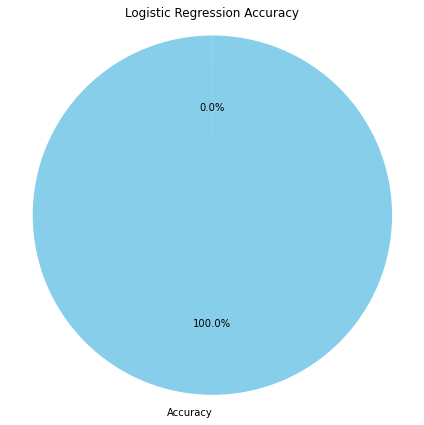

In [28]:
plt.figure(figsize=(6, 6))
plt.pie([lr_accuracy, 1 - lr_accuracy], labels=["Accuracy", ""], colors=['skyblue', 'lightgrey'], autopct='%1.1f%%', startangle=90)
plt.title("Logistic Regression Accuracy")
plt.axis('equal')
plt.tight_layout()
plt.show()


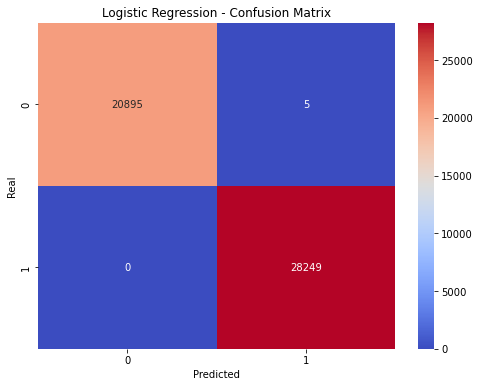

In [29]:
plt.figure(figsize=(8, 6))
sns.heatmap(lr_confusion_matrix, annot=True, cmap='coolwarm', fmt='g')
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Real")
plt.show()


## Applying Random Forest Classifier

The second model chosen for analysis is the random forest classifier. This model employs random subsets of the data to construct multiple decision trees. Next, it categorizes the data by aggregating predictions from these trees and selecting the most common result. Notably, the random forest classifier achieved a flawless result with an accuracy of 1.0, surpassing the performance of the logistic regression model.

Instantiate the Random Forest Classifier model by creating an instance of it, then train the model using the training data.

In [30]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [31]:
rf_predictions = rf.predict(x_train)
rf_accuracy = accuracy_score(y_train, rf_predictions)
rf_report = classification_report(y_train, rf_predictions)
rf_confusion_matrix = confusion_matrix(y_train, rf_predictions)

In [32]:
print('Report:')
print(rf_report)
print('Accuracy:', rf_accuracy)

Report:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00     20900
        True       1.00      1.00      1.00     28249

    accuracy                           1.00     49149
   macro avg       1.00      1.00      1.00     49149
weighted avg       1.00      1.00      1.00     49149

Accuracy: 1.0


Upon comparing both classification reports, it's evident that they exhibit nearly identical performance. Once both models showcase exceptional performance metrics, I decided to keep only them.

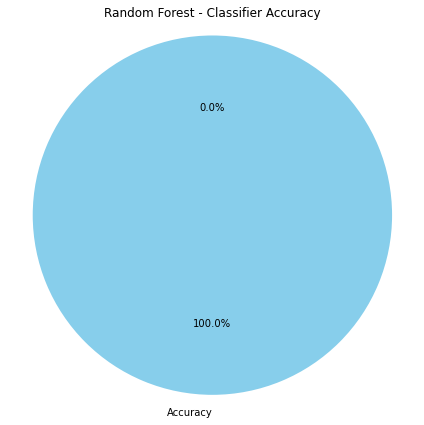

In [33]:
plt.figure(figsize=(6, 6))
plt.pie([rf_accuracy, 1 - rf_accuracy], labels=["Accuracy", ""], colors=['skyblue', 'lightgrey'], autopct='%1.1f%%', startangle=90)
plt.title("Random Forest - Classifier Accuracy")
plt.axis('equal')
plt.tight_layout()
plt.show()

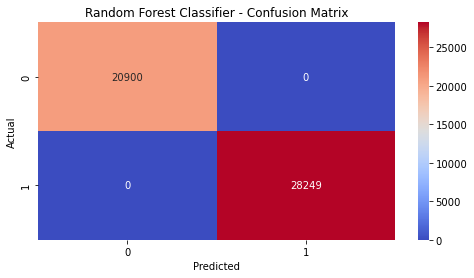

In [34]:
plt.figure(figsize=(8, 4))
sns.heatmap(rf_confusion_matrix, annot=True, cmap='coolwarm', fmt='g')
plt.title("Random Forest Classifier - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# Comparing Algorithms

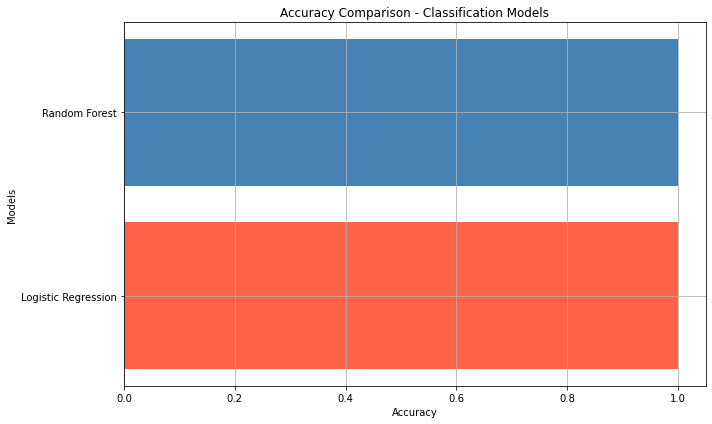

In [35]:
models = ['Logistic Regression', 'Random Forest']
accuracies = [lr_accuracy, rf_accuracy]

plt.figure(figsize=(10, 6))
plt.barh(models, accuracies, color=['#FF6347', '#4682B4'])
plt.title('Accuracy Comparison - Classification Models')
plt.xlabel('Accuracy')
plt.ylabel('Models')
plt.grid(True)
plt.tight_layout()
plt.show()


# Testing data

As for the choise of a classification algorithm, I've opted for logistic regression once it is the most straight-forward one. Given that all selected models have exhibited comparable overall performance, with accuracy scores close enough to 1 (0.99989). Logistic regression offers ease of interpretation, understanding, and implementation, guaranteeing satisfactory results while conserving computing resources.

Instantiating and training Linear Regression with testing data.

In [36]:
lr_fin_predict = lr.predict(x_test)

In [37]:
lr_fin_accuracy = accuracy_score(y_test, lr_fin_predict)
lr_fin_report = classification_report(y_test, lr_fin_predict)

When evaluating the model with the testing data, we observed higher accuracy compared to the training data. Despite a slight difference, we achieved perfect accuracy using a simpler model without hyperparameter tuning, resulting in reduced computational resource utilization. This highlights the notion that while more intricate approaches may appear more effective, simplicity can often yield comparable results.

In [38]:
print('Report:')
print(lr_fin_report)
print('Accuracy:', lr_fin_accuracy)

Report:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      6992
        True       1.00      1.00      1.00      9391

    accuracy                           1.00     16383
   macro avg       1.00      1.00      1.00     16383
weighted avg       1.00      1.00      1.00     16383

Accuracy: 1.0


The following plot illustrates the accuracy of the training and testing predictions, as well as the difference between them. It is evident that the discrepancy is really small.

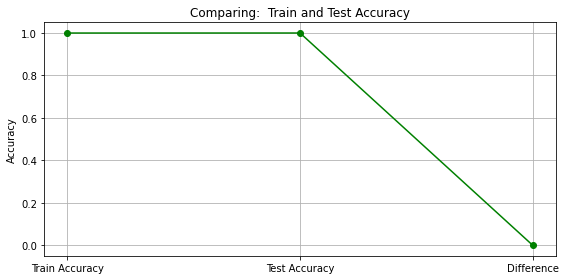

In [39]:
accuracy_difference = lr_fin_accuracy - lr_accuracy

plt.figure(figsize=(8, 4))
plt.plot(["Train Accuracy", "Test Accuracy", "Difference"], [lr_accuracy, lr_fin_accuracy, accuracy_difference], marker='o', color='green')
plt.title("Comparing:  Train and Test Accuracy")
plt.ylabel("Accuracy")
plt.grid(True)
plt.tight_layout()
plt.show()


# Conclusion

Upon analyzing the "log2.csv" firewall dataset, it was evident that 'allow' was the predominant action. However, when examining NAT source and destination ports, 'allow' was not the majority when both NAT addresses were identical, likely due to returned or dropped packets.

Logistic Regression and Random Forest classifier were chosen for training. Data preparation involved One-Hot Encoding for action categories and MinMaxScaler for numeric variables to ensure uniformity and scaling. The dataset was then split into training and testing sets for model application, followed by performance evaluation using metrics like accuracy and precision.

Visualizations such as accuracy plots and confusion matrices enhanced in performance comparison. Although random forest classifier displayed higher accuracy, logistic regression was chosen for its simplicity and interpretability. Remarkably, logistic regression achieved perfect accuracy on the test data.

# References:

- BSc (Hons) in Computing in IT - Sept 2020 cohort, 2020. "Machine Learning for AI." Moodle. Available at: https://moodle.cct.ie/course/view.php?id=22 (Accessed: 25 March 2024).


- Gcmadhan, 2021. "Diamond Price Hypothesis Testing Model (98% Accuracy)." Kaggle. Available at: https://www.kaggle.com/code/gcmadhan/diamond-price-hypothesis-testing-model-98-accur/notebook (Accessed: 26 March 2024).


- Mahadevan, M. (2024) Step-by-Step Exploratory Data Analysis (EDA) using Python, Analytics Vidhya. Available at: https://www.analyticsvidhya.com/blog/2022/07/step-by-step-exploratory-data-analysis-eda-using-python/ (Accessed: 26 March 2024).


- Kumar, A. (2023) MinMaxScaler vs StandardScaler - Python Examples, Analytics Yogi. Available at: https://vitalflux.com/minmaxscaler-standardscaler-python-examples/ (Accessed: 06 April 2024).


- GfG (2023) Linear Regression (Python Implementation), GeeksforGeeks. Available at: https://www.geeksforgeeks.org/linear-regression-python-implementation/ (Accessed: 05 April 2024).


- Shafi, A. (2023) Random Forest Classification with Scikit-Learn, DataCamp. Available at: https://www.datacamp.com/tutorial/random-forests-classifier-python (Accessed: 05 April 2024).

